In [19]:
!pip install numpy
!pip install pandas
!pip install mlxtend
!pip install netowrkx

/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=2431) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=2431) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=2431) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=2431) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


ERROR: Could not find a version that satisfies the requirement netowrkx (from versions: none)
ERROR: No matching distribution found for netowrkx


### Step 1: Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

### Step 2: Loading and exploring the data

In [4]:
import pandas as pd
df = pd.read_csv("Groceries_dataset.csv")
print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


Each row represents one item in a customer's basket on a given date.
To use the Apriori algorithm we must convert this into full transactions per customer per visit.

### Step 3: Group Items by Transaction
We group items purchased together by the same customer on the same day to form one transaction.

In [6]:
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
transactions, basket

([['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
  ['whole milk', 'pastry', 'salty snack'],
  ['canned beer', 'misc. beverages'],
  ['sausage', 'hygiene articles'],
  ['soda', 'pickled vegetables'],
  ['frankfurter', 'curd'],
  ['sausage', 'whole milk', 'rolls/buns'],
  ['whole milk', 'soda'],
  ['beef', 'white bread'],
  ['frankfurter', 'soda', 'whipped/sour cream'],
  ['frozen vegetables', 'other vegetables'],
  ['butter', 'whole milk'],
  ['tropical fruit', 'sugar'],
  ['butter milk', 'specialty chocolate'],
  ['sausage', 'rolls/buns'],
  ['root vegetables', 'detergent'],
  ['frozen meals', 'dental care'],
  ['rolls/buns', 'rolls/buns'],
  ['dish cleaner', 'cling film/bags'],
  ['canned beer', 'frozen fish'],
  ['other vegetables', 'hygiene articles'],
  ['pip fruit', 'whole milk', 'tropical fruit'],
  ['rolls/buns', 'red/blush wine', 'chocolate'],
  ['other vegetables', 'shopping bags'],
  ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
  ['root

### Step 4: Convert to One-Hot Format
Apriori needs data in True/False format like Did the item appear in the basket?. We use Transaction Encoder for this:

In [8]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Step 5: Run Apriori Algorithm
Now we find frequent itemsets combinations of items that often occur together. Here min_support=0.01 means itemsets that appear in at least 1% of transactions. This gives us common combinations of items.

In [9]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])
frequent_itemsets

Total Frequent Itemsets: 69


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(soda, whole milk)"


### Step 6: Generate Association Rules
Now we find rules like If bread and butter are bought, milk is also likely to be bought.

- Support: How often the rule appears in the dataset.
- Confidence: Probability of buying item B if item A is bought.
- Lift: Strength of the rule over random chance. (>1 means it's a good rule)

Also some keywords to note:
- Antecedents: The item(s) on the left-hand side (LHS) of the rule [the condition].
- Consequents: The item(s) on the right-hand side (RHS) of the rule [the outcome].

In [12]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


### Step 7: Visualize the Most Popular Items
Let’s see which items are most frequently bought:

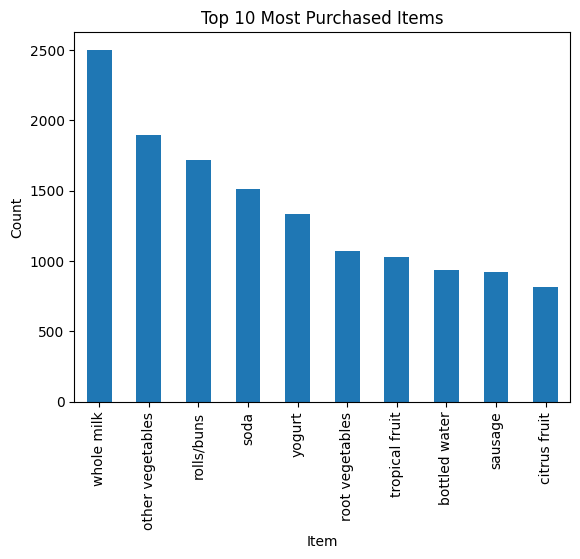

In [13]:
import matplotlib.pyplot as plt
top_items = df['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()

As shown in the above output Whole milk is the most frequently bought item, followed by other vegetables, rolls/bun and soda.

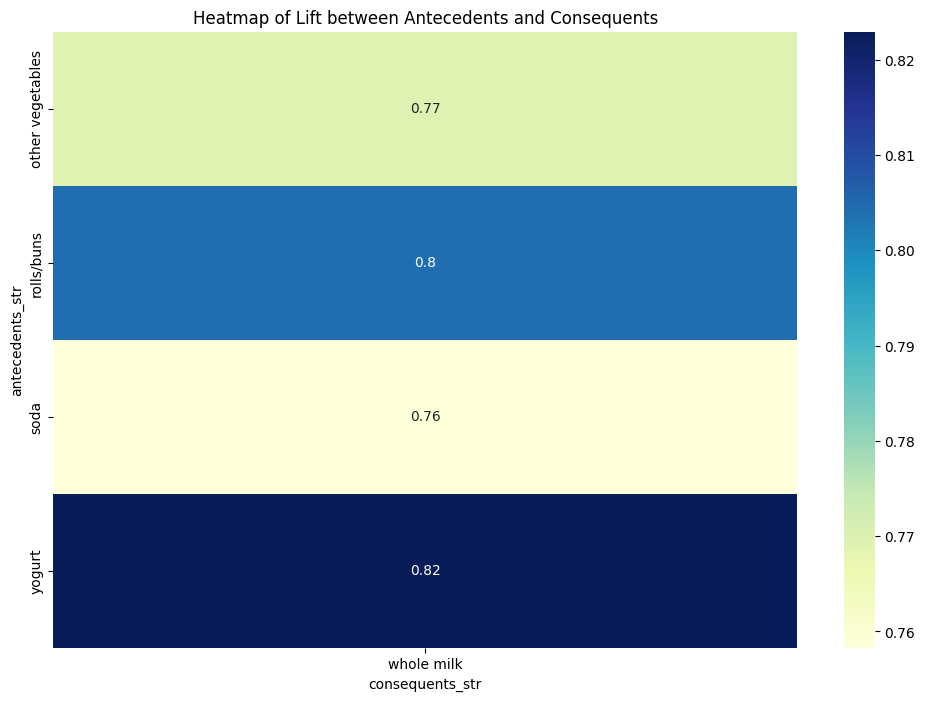

In [21]:
import seaborn as sns

# Convert frozensets to strings for heatmap
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

pivot = rules.pivot(index='antecedents_str', columns='consequents_str', values='lift')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Lift between Antecedents and Consequents')
plt.show()


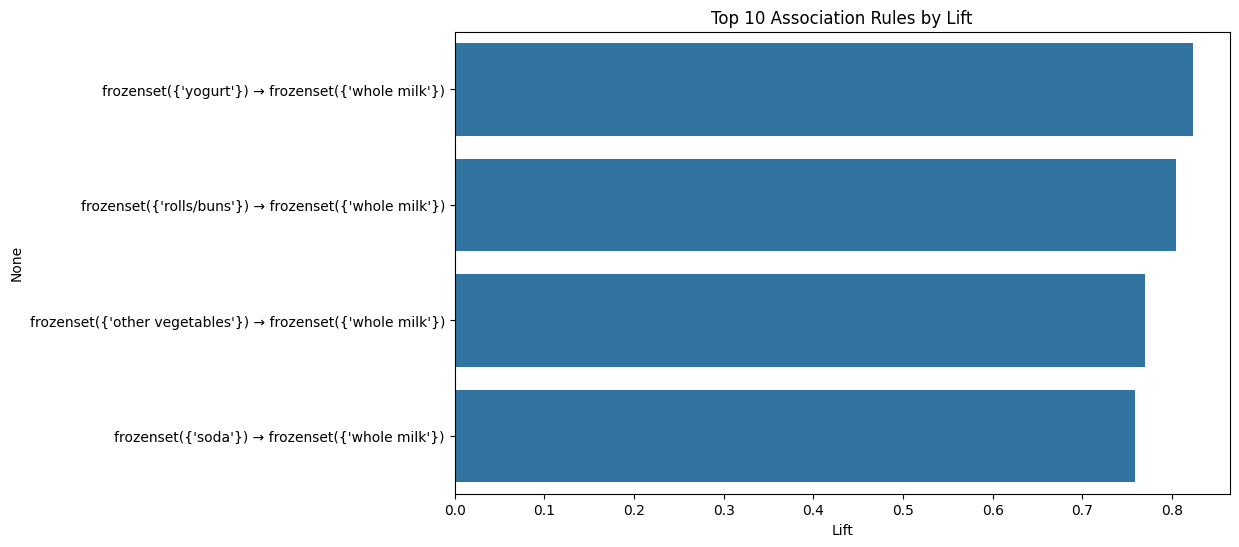

In [22]:
rules_sorted = rules.sort_values('lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=rules_sorted['lift'], y=rules_sorted['antecedents'].astype(str) + ' → ' + rules_sorted['consequents'].astype(str))
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.show()